In [6]:
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt


import config
import Test_without_Training

def get_data(K1, K2, subj1, subj2):
    trainer1 = Test_without_Training.TremorModelTrainer(config, subject=subj1)
    X1_train, y1_train, X1_test, y1_test = trainer1.return_K_data(K=K1)

    trainer2 = Test_without_Training.TremorModelTrainer(config, subject=subj2)
    X2_train, y2_train, X2_test, y2_test = trainer2.return_K_data(K=K2)

    # Combine and shuffle training data from both subjects
    X_train = np.concatenate([X1_train, X2_train], axis=0)
    y_train = np.concatenate([y1_train, y2_train], axis=0)
    idx = np.random.permutation(len(X_train))
    X_train, y_train = X_train[idx], y_train[idx]

    return {
        "trainer": trainer2,  # just pick one to call train_multiple_dataset
        "X1_train": X1_train, "y1_train": y1_train,
        "X2_train": X2_train, "y2_train": y2_train,
        "X_train": X_train,   "y_train": y_train,
        "X1_test": X1_test,   "y1_test": y1_test,
        "X2_test": X2_test,   "y2_test": y2_test
    }

def get_results(K1, K2, subj1, subj2):
    data = get_data(K1, K2, subj1, subj2)
    trainer = data["trainer"]

    # Train with mixed, only subj2, and only subj1
    acc1, model_mix = trainer.train_multiple_dataset(data["X_train"], data["y_train"], data["X1_test"], data["y1_test"])
    acc2, model_s2  = trainer.train_multiple_dataset(data["X2_train"], data["y2_train"], data["X1_test"], data["y1_test"])
    acc3, model_s1  = trainer.train_multiple_dataset(data["X1_train"], data["y1_train"], data["X1_test"], data["y1_test"])

    # Evaluate all models on subj2
    _, acc_mix_s2 = model_mix.evaluate(data["X2_test"], data["y2_test"], verbose=0)
    _, acc_s2_s2  = model_s2.evaluate(data["X2_test"], data["y2_test"], verbose=0)
    _, acc_s1_s2  = model_s1.evaluate(data["X2_test"], data["y2_test"], verbose=0)

    return [acc1, acc2, acc3], [acc_mix_s2, acc_s2_s2, acc_s1_s2], data, [model_mix, model_s1, model_s2]

def print_results(acc_H, acc_X):
    print(f"Trained with Subjects 1 and 2 / Tested on 1 (Inter-session):     {acc_H[0]:.2f}%")
    print(f"Trained with Subject 1        / Tested on 1 (Inter-session):     {acc_H[2]:.2f}%")
    print(f"Trained with Subject 2        / Tested on 1 (Inter-subject):     {acc_H[1]:.2f}%\n")

    print(f"Trained with Subjects 1 and 2 / Tested on 2 (Inter-session):     {acc_X[0]*100:.2f}%")
    print(f"Trained with Subject 2        / Tested on 2 (Inter-session):     {acc_X[1]*100:.2f}%")
    print(f"Trained with Subject 1        / Tested on 2 (Inter-subject):     {acc_X[2]*100:.2f}%")


def analyze_class_distribution(y, title, show_stats):
    counter = Counter(y)
    total = sum(counter.values())
    classes = sorted(counter.keys())
    counts = [counter[c] for c in classes]
    portions = [c / total for c in counts]

    if show_stats:
        print(f"\nClass distribution for {title}:")
        for cls, count, portion in zip(classes, counts, portions):
            print(f"  Class {cls}: {count} samples ({portion:.2%})")

    # Optional: Bar plot
    plt.figure(figsize=(6, 3))
    plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
    sns.barplot(x=classes, y=counts, palette="Blues_d")
    plt.title(f"Class Counts - {title}")
    plt.xlabel("Class Label")
    plt.ylabel("Count")
    plt.show()

In [7]:
acc_H_base, acc_X_base, data_base, models = get_results(K1=1, K2=1, subj1="Hunmin", subj2="Xianyu")
acc_H, acc_X, data, models2 = get_results(K1=28, K2=6, subj1="Hunmin", subj2="Xianyu")

Dataset 1/34 - Session Exp_2025-05-27/E8331D05289A/
Dataset 2/34 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Dataset 3/34 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Dataset 4/34 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Dataset 5/34 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Dataset 6/34 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Dataset 7/34 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Dataset 8/34 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Dataset 9/34 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Dataset 10/34 - Session Exp_2025-06-20-v8/E9AD0E7DCC2B/
Dataset 11/34 - Session Exp_2025-06-23-v1/E9AD0E7DCC2B/
Dataset 12/34 - Session Exp_2025-06-23-v2/E9AD0E7DCC2B/
Dataset 13/34 - Session Exp_2025-06-23-v3/E9AD0E7DCC2B/
Dataset 14/34 - Session Exp_2025-06-23-v4/E9AD0E7DCC2B/
Dataset 15/34 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Dataset 16/34 - Session Exp_2025-06-24-v2/E9AD0E7DCC2B/
Dataset 17/34 - Session Exp_2025-06-24-v3/E9AD0E7DCC2B/
Dataset 18/34 - Session Exp_2025-06-24-v4/E9AD0E7DCC2B/
Dataset

In [8]:
print_results(acc_H_base, acc_X_base)
print("\n")
print_results(acc_H, acc_X)

Trained with Subjects 1 and 2 / Tested on 1 (Inter-session):     75.40%
Trained with Subject 1        / Tested on 1 (Inter-session):     82.82%
Trained with Subject 2        / Tested on 1 (Inter-subject):     69.97%

Trained with Subjects 1 and 2 / Tested on 2 (Inter-session):     70.59%
Trained with Subject 2        / Tested on 2 (Inter-session):     70.52%
Trained with Subject 1        / Tested on 2 (Inter-subject):     51.57%


Trained with Subjects 1 and 2 / Tested on 1 (Inter-session):     90.26%
Trained with Subject 1        / Tested on 1 (Inter-session):     91.47%
Trained with Subject 2        / Tested on 1 (Inter-subject):     77.02%

Trained with Subjects 1 and 2 / Tested on 2 (Inter-session):     68.48%
Trained with Subject 2        / Tested on 2 (Inter-session):     71.17%
Trained with Subject 1        / Tested on 2 (Inter-subject):     53.13%


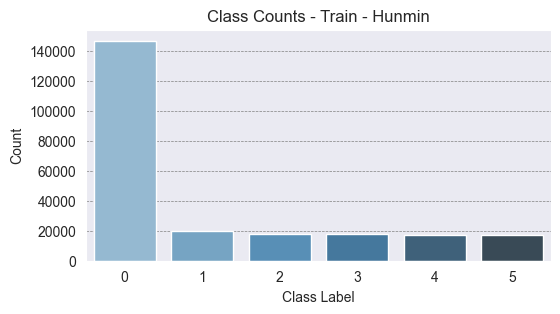

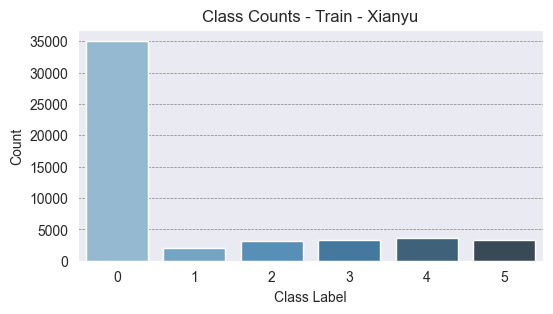

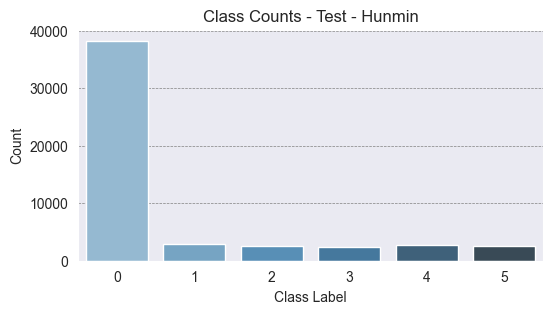

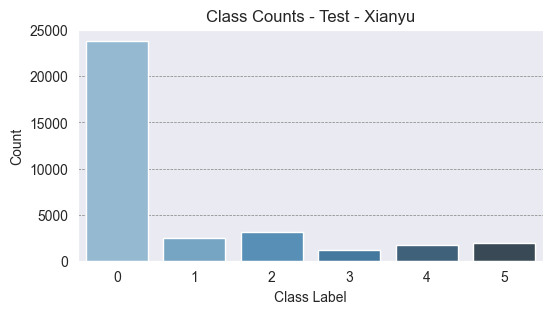

In [4]:
subj1, subj2 = "Hunmin", "Xianyu"
analyze_class_distribution(data["y1_train"], f"Train - {subj1}", show_stats=False)
analyze_class_distribution(data["y2_train"], f"Train - {subj2}", show_stats=False)
analyze_class_distribution(data["y1_test"], f"Test - {subj1}", show_stats=False)
analyze_class_distribution(data["y2_test"], f"Test - {subj2}", show_stats=False)

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, X_test, y_test, title="Confusion Matrix"):
    y_pred = model.predict(X_test, verbose=0)
    if y_pred.ndim > 1:
        y_pred = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    plt.figure(figsize=(6, 5))
    disp.plot(cmap="Blues", values_format="d")
    plt.title(title)
    plt.show()


<Figure size 600x500 with 0 Axes>

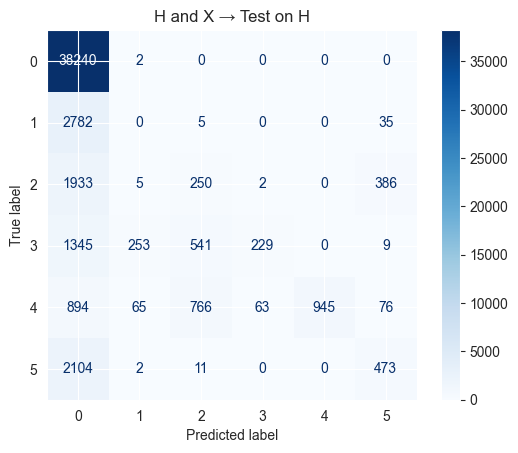

<Figure size 600x500 with 0 Axes>

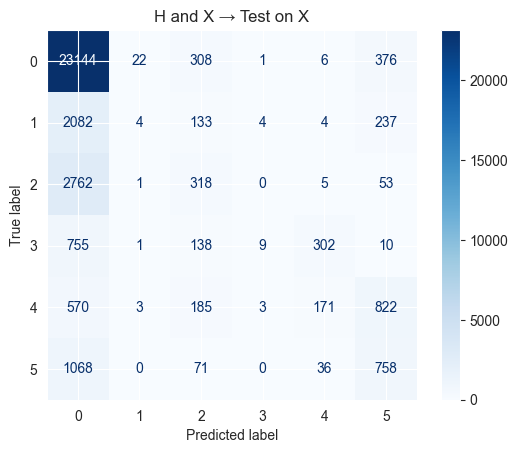

<Figure size 600x500 with 0 Axes>

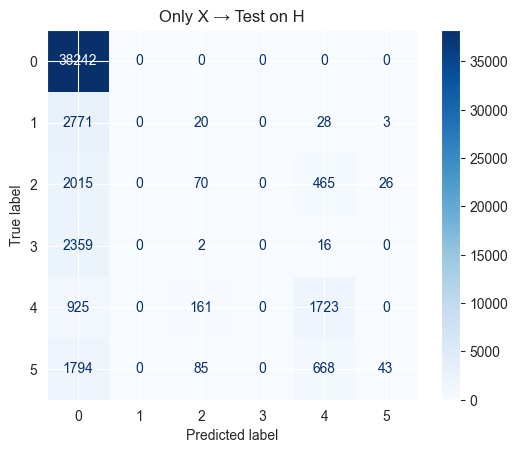

<Figure size 600x500 with 0 Axes>

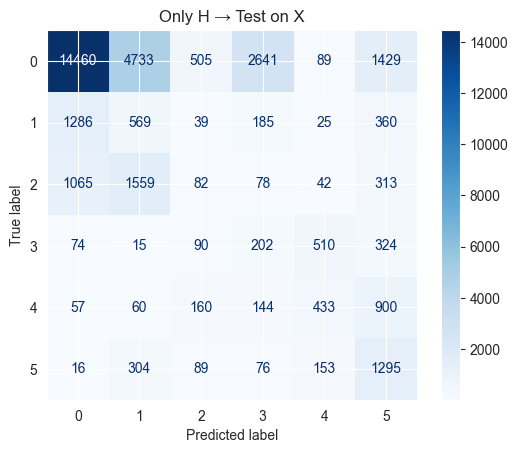

In [13]:
model_mix, model_s1, model_s2 = models[0], models[1], models[2]
evaluate_model(model_mix, data["X1_test"], data["y1_test"], title="H and X → Test on H")
evaluate_model(model_mix, data["X2_test"], data["y2_test"], title="H and X → Test on X")
evaluate_model(model_s2, data["X1_test"], data["y1_test"], title="Only X → Test on H")
evaluate_model(model_s1, data["X2_test"], data["y2_test"], title="Only H → Test on X")

We do not use the balanced data
- Because the data is biased and we want the model to be biased too

In [ ]:
# Which gesture has better accuracy?

# Improve the model itself not the learning method